# Modeling and Simulation Project 1
Audrey Lee and Casey May

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import math
import statistics
import csv

In [2]:
#reads the html and csv file for world population over time
from pandas import read_html
from pandas import read_csv

filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [3]:
#Each year represents the total fertility rate in each country over five years after said year
filename2 = 'data/totalfertility.csv'
tables2 = read_csv(filename2, header = 0, index_col=0, decimal='M', encoding = "ISO-8859-1")
tables2.columns = ['1950', '1955', '1960', '1965', 
                  '1970', '1975', '1980', '1985', 
                  '1990', '1995', '2000', '2005', '2010']

In [4]:
#convert strings to float
import numpy as np
birthRates = list(np.float_(tables2));

In [5]:
sum =0
#changes the data to fit our 3 child policy
    #if the fertility rate is above 3, the number added to the sum is 3 (numbers below 3 are just the actual numbers)
for changeC in range(1, 13):
    for changeR in range(0, 230):     
        if birthRates[changeR][changeC] > 3.0:
            sum += 3.0
        elif birthRates[changeR][changeC] <= 3.0:
            sum += birthRates[changeR][changeC]
#calculates the average birth rate in all countries/regions
mean = sum/(230*13)


2.442849498327761

In [6]:
#setting the template for what will eventually show our results
def plot_results(census, un, timeseries, timeseries3, title):
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    if len(timeseries):
        plot(timeseries, color='gray', label='model, no child limit')
    if len(timeseries3):
        plot(timeseries3, color='purple', label='model, three child limit')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

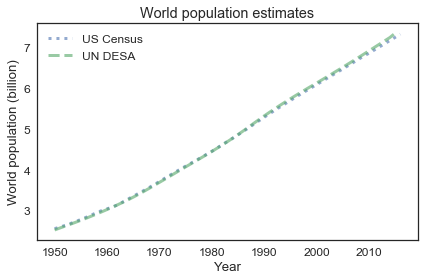

In [7]:
#sets variables to plot for UN and Census data
un = table2.un / 1e9
census = table2.census / 1e9
empty = TimeSeries()
empty3 = TimeSeries()
plot_results(census, un, empty, empty3, 'World population estimates')

# How long would it take to reach carrying capacity if there was a three child limit imposed on the world population?

To explore this question, we will look for a model that will simulate the world population if there was a three child global limit.

The true carrying capacity number is nearly impossible to determine, because it requires knowing how efficient our technology becomes, and also knowing how many people are willing to make sacrifices in their own living. Estimates range from 2 billion to 1,024 Billion. All of these estimates base these numbers off of assumptions that are dangerous to make. 8-10 billion people, however, is a popular average estimate. One man, Edward O. Wilson, looked at the amount of food the world can produce. There is enough food to feed 10 billion + vegetarians, but because of the huge drain that is meat consumption, this number greatly falls. Even if a child limit is set, global resources will continue to dry p because more and more countries are developing and expecting more for their citizens.  Because of this necessity, it is realistically likely that the carrying capacity is less than 10 billion, but as people tend to love looking at the best possible outcomes, we’re going to go with an even 10 billion.  


We'll use the 1950 world population from the US Census as an initial condition.

In [8]:
#providing the information needed to graph the three child and no limit lines
def update_func(pop, t, system):
    net_growth = .0157083 * pop
    return pop + net_growth

def update_func3(pop, t, system):
    net_growth = (2.442849498327761-2.4336)*pop
    return pop + net_growth

In [14]:
def run_simulation(system, update_func):
    results = TimeSeries()
    results3 = TimeSeries()
    
    results[system.t_0] = system.p_0
    results3[system.t_0]= system.p_0
    
   #registering the previous result and plugging it back into their respective update_func equations
    for t in linrange(system.t_0, system.t_end):
        results[t+1] =  update_func(results[t], t, system)
        results3[t+1] =  update_func3(results3[t], t, system)
        
        #setting the boundaries to find carrying capacity for both no limits and three child limits
        if results[t+1] >= 10 and results[t+1] <= 10.1:
            print(t)
        if results3[t+1] >= 10 and results3[t+1] <= 10.1:
            print(t)
    return results

In [15]:
#initialize the start time and set the end year
t_0 = get_first_label(census)
t_end = 2100
p_0 = census[t_0]

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0)

,values
t_0,1950.000000
t_end,2100.000000
p_0,2.557629


2037.0
2098.0
2098.0
2098.0
Saving figure to file figs/ModSimProject-fig04.pdf


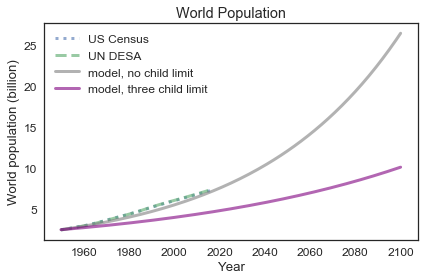

In [16]:
#plotting the results, using the created functions as variables 
results = run_simulation(system, update_func)
results3 = run_simulation(system, update_func3)
plot_results(census, un, results, results3, 'World Population')
savefig('figs/ModSimProject-fig04.pdf')

This figure shows the results from our model along with world population estimates from the United Nations Department of Economic and Social Affairs (UN DESA) and the US Census Bureau.

The model predicts the population in the shown years if there was a three child limit imposed on the world population. 

This model predicts that the world population would reach our estimated carrying capacity at year 2037 when there is no limit and 2098 when the world population is limited to three children per mother. 

This means that the world population with a three child limit would take longer to reach carrying capacity than with no limit at all.

We made quite a few assumptions during our process; many of them were bad. For our first model, we assumed that China’s data could be extrapolated to the entire world. Additionally, we assumed that there were no variables other than child limits that would affect China’s growth rate. The previous model we had extrapolated from data of China's one and two child limits as well as there being a no child limit. Our previous graph didn't yield the results we expected from applying a three child limit. We think this skewing can be attributed to multiple social factors in China that caused a continued decrease in population growth rate even after the one child limit was removed and the two child limit was imposed. 

For this model, we calculated the average fertility rate and changed any rates above three to be three. We assumed that people who were having more than three children would be limited to only three, so even though three is the limit, some people might decide they want to have two or maybe even one child. We also assumed the deaths per mother rate in order to counteract our average fertility rate and create a net population growth.

In future work, we would explore the different possibilities of carrying capacity We would also create more complex models that would neutralize the many variables and errors in our current model. 